## Data Exploration

In [26]:
import pandas as pd
import numpy as np
columns_file = 'census-bureau.columns'
data_file = 'census-bureau.data'
columns = pd.read_csv(columns_file, header=None).iloc[:, 0].tolist()
df = pd.read_csv(data_file, delimiter=',', header=None, names=columns)

In [27]:
na_values = ['?', 'NA', 'N/A', '', 'nan',' ', 'null', 'Null', 'NULL', 'NaN']
df = df.replace(na_values, np.nan)
df.isna().sum()[df.isna().sum() > 0] 

hispanic origin                     874
state of previous residence         708
migration code-change in msa      99696
migration code-change in reg      99696
migration code-move within reg    99696
migration prev res in sunbelt     99696
country of birth father            6713
country of birth mother            6119
country of birth self              3393
dtype: int64

In [28]:
df.duplicated().sum()

3229

In [33]:
100*(df.duplicated().sum())/len(df)

1.6183597880946057

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['target'] = df['label'].apply(lambda x: 1 if '50000+' in x else 0)
df.drop('label', axis=1, inplace=True)

In [7]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196294 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         196294 non-null  int64  
 1   class of worker                             196294 non-null  object 
 2   detailed industry recode                    196294 non-null  int64  
 3   detailed occupation recode                  196294 non-null  int64  
 4   education                                   196294 non-null  object 
 5   wage per hour                               196294 non-null  int64  
 6   enroll in edu inst last wk                  196294 non-null  object 
 7   marital stat                                196294 non-null  object 
 8   major industry code                         196294 non-null  object 
 9   major occupation code                       196294 non-null  object 
 10  r

In [9]:
df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,target
count,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000
mean,34.929468,15.603187,11.490468,56.336505,441.870037,37.927593,200.722386,1743.267584,1.988105,0.178304,1.538183,23.553889,94.499328,0.063079
std,22.210001,18.106401,14.498128,277.054333,4735.677027,274.081174,2000.130616,996.945985,2.371018,0.557739,0.836813,24.428588,0.500001,0.243105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.530000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,34.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1620.175000,1.000000,0.000000,2.000000,12.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2194.060000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [10]:
numerical_columns = [
    'age',
    'wage per hour',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'num persons worked for employer',
    'weeks worked in year',
    'weight'
]
categorical_columns = [
    'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'enroll in edu inst last wk',
    'marital stat',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    "fill inc questionnaire for veteran's admin",
    'veterans benefits',
    'year',
    'target'
]
len(numerical_columns), len(categorical_columns)

(8, 34)

In [11]:
def summarize(df):
    numeric_stats = {}
    categorical_stats = {}
    for col in numerical_columns:
        s = df[col]
        numeric_stats[col] = {
            "Null Count": f'{s.isnull().sum()} ({(s.isnull().sum() / len(s)) * 100:.2f}%)',
            "NaN Count": f'{s.isna().sum()} ({(s.isna().sum() / len(s)) * 100:.2f}%)',
            "Unique Values": s.nunique(),
            "Min": s.min(),
            "Max": s.max(),
            "Mean": s.mean(),
            "Median": s.median(),
        }
    for col in categorical_columns:
        s = df[col] 

        nulls = s.isnull().sum()
        nans = s.isna().sum()
        uniques = s.nunique(dropna=True)
        
        empty_strings = (s == "").sum()

        most_freq = s.mode(dropna=True)[0] if not s.mode(dropna=True).empty else "N/A"
        freq_count = s.value_counts(dropna=True).iloc[0] if not s.value_counts(dropna=True).empty else "N/A"

        categorical_stats[col] = {
            "Null Count": f'{nulls} ({(nulls / len(s)) * 100:.2f}%)',
            "NaN Count": f'{nans} ({(nans / len(s)) * 100:.2f}%)',
            "Unique Values": uniques,
            "Most Frequent": most_freq,
            "Frequency Count": freq_count,
            "Empty String Count": empty_strings,
        }

    numeric_df = pd.DataFrame(numeric_stats).T
    categorical_df = pd.DataFrame(categorical_stats).T

    return numeric_df, categorical_df


In [12]:
num_cols_stats, cat_cols_stats = summarize(df)

In [13]:
num_cols_stats

,Null Count,NaN Count,Unique Values,Min,Max,Mean,Median
age,0 (0.00%),0 (0.00%),91,0,90,34.929468,34.0
wage per hour,0 (0.00%),0 (0.00%),1240,0,9999,56.336505,0.0
capital gains,0 (0.00%),0 (0.00%),132,0,99999,441.870037,0.0
capital losses,0 (0.00%),0 (0.00%),113,0,4608,37.927593,0.0
dividends from stocks,0 (0.00%),0 (0.00%),1478,0,99999,200.722386,0.0
num persons worked for employer,0 (0.00%),0 (0.00%),7,0,6,1.988105,1.0
weeks worked in year,0 (0.00%),0 (0.00%),53,0,52,23.553889,12.0
weight,0 (0.00%),0 (0.00%),99800,37.87,18656.3,1743.267584,1620.175


In [14]:
cat_cols_stats

,Null Count,NaN Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
class of worker,0 (0.00%),0 (0.00%),9,Not in universe,97029,0
detailed industry recode,0 (0.00%),0 (0.00%),52,0,97467,0
detailed occupation recode,0 (0.00%),0 (0.00%),47,0,97467,0
education,0 (0.00%),0 (0.00%),17,High school graduate,48374,0
enroll in edu inst last wk,0 (0.00%),0 (0.00%),3,Not in universe,183762,0
marital stat,0 (0.00%),0 (0.00%),7,Married-civilian spouse present,84194,0
major industry code,0 (0.00%),0 (0.00%),24,Not in universe or children,97467,0
major occupation code,0 (0.00%),0 (0.00%),15,Not in universe,97467,0
race,0 (0.00%),0 (0.00%),5,White,164380,0
hispanic origin,870 (0.44%),870 (0.44%),9,All other,168803,0


In [17]:
df['target'].value_counts(normalize=True)*100

target
0    93.692115
1     6.307885
Name: proportion, dtype: float64

This is a highly imbalanced dataset with a 93.7% - 6.3% split for the target class

## Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_numeric_grid(df, numeric_cols, bins=50, log_scale=False):
    n = len(numeric_cols)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.histplot(df[col].values, bins=bins, kde=False, ax=ax, stat='probability')
        if log_scale:
            ax.set_yscale("log")
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_categorical_grid(df, cat_cols, top_n=15):
    n = len(cat_cols)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        counts = df[col].value_counts(normalize=True).head(top_n)*100
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_title(col)
        ax.set_ylabel("Percentage (%)")
        ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


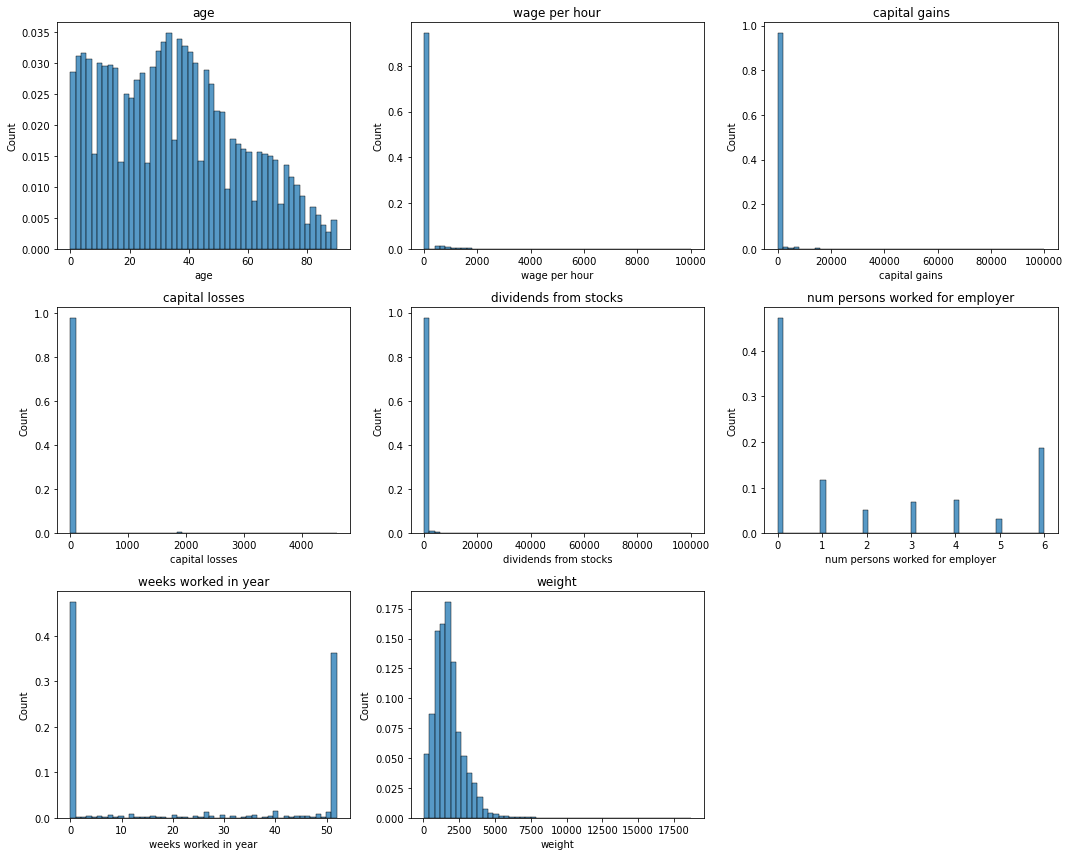

In [25]:
plot_numeric_grid(df, numerical_columns)


<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4

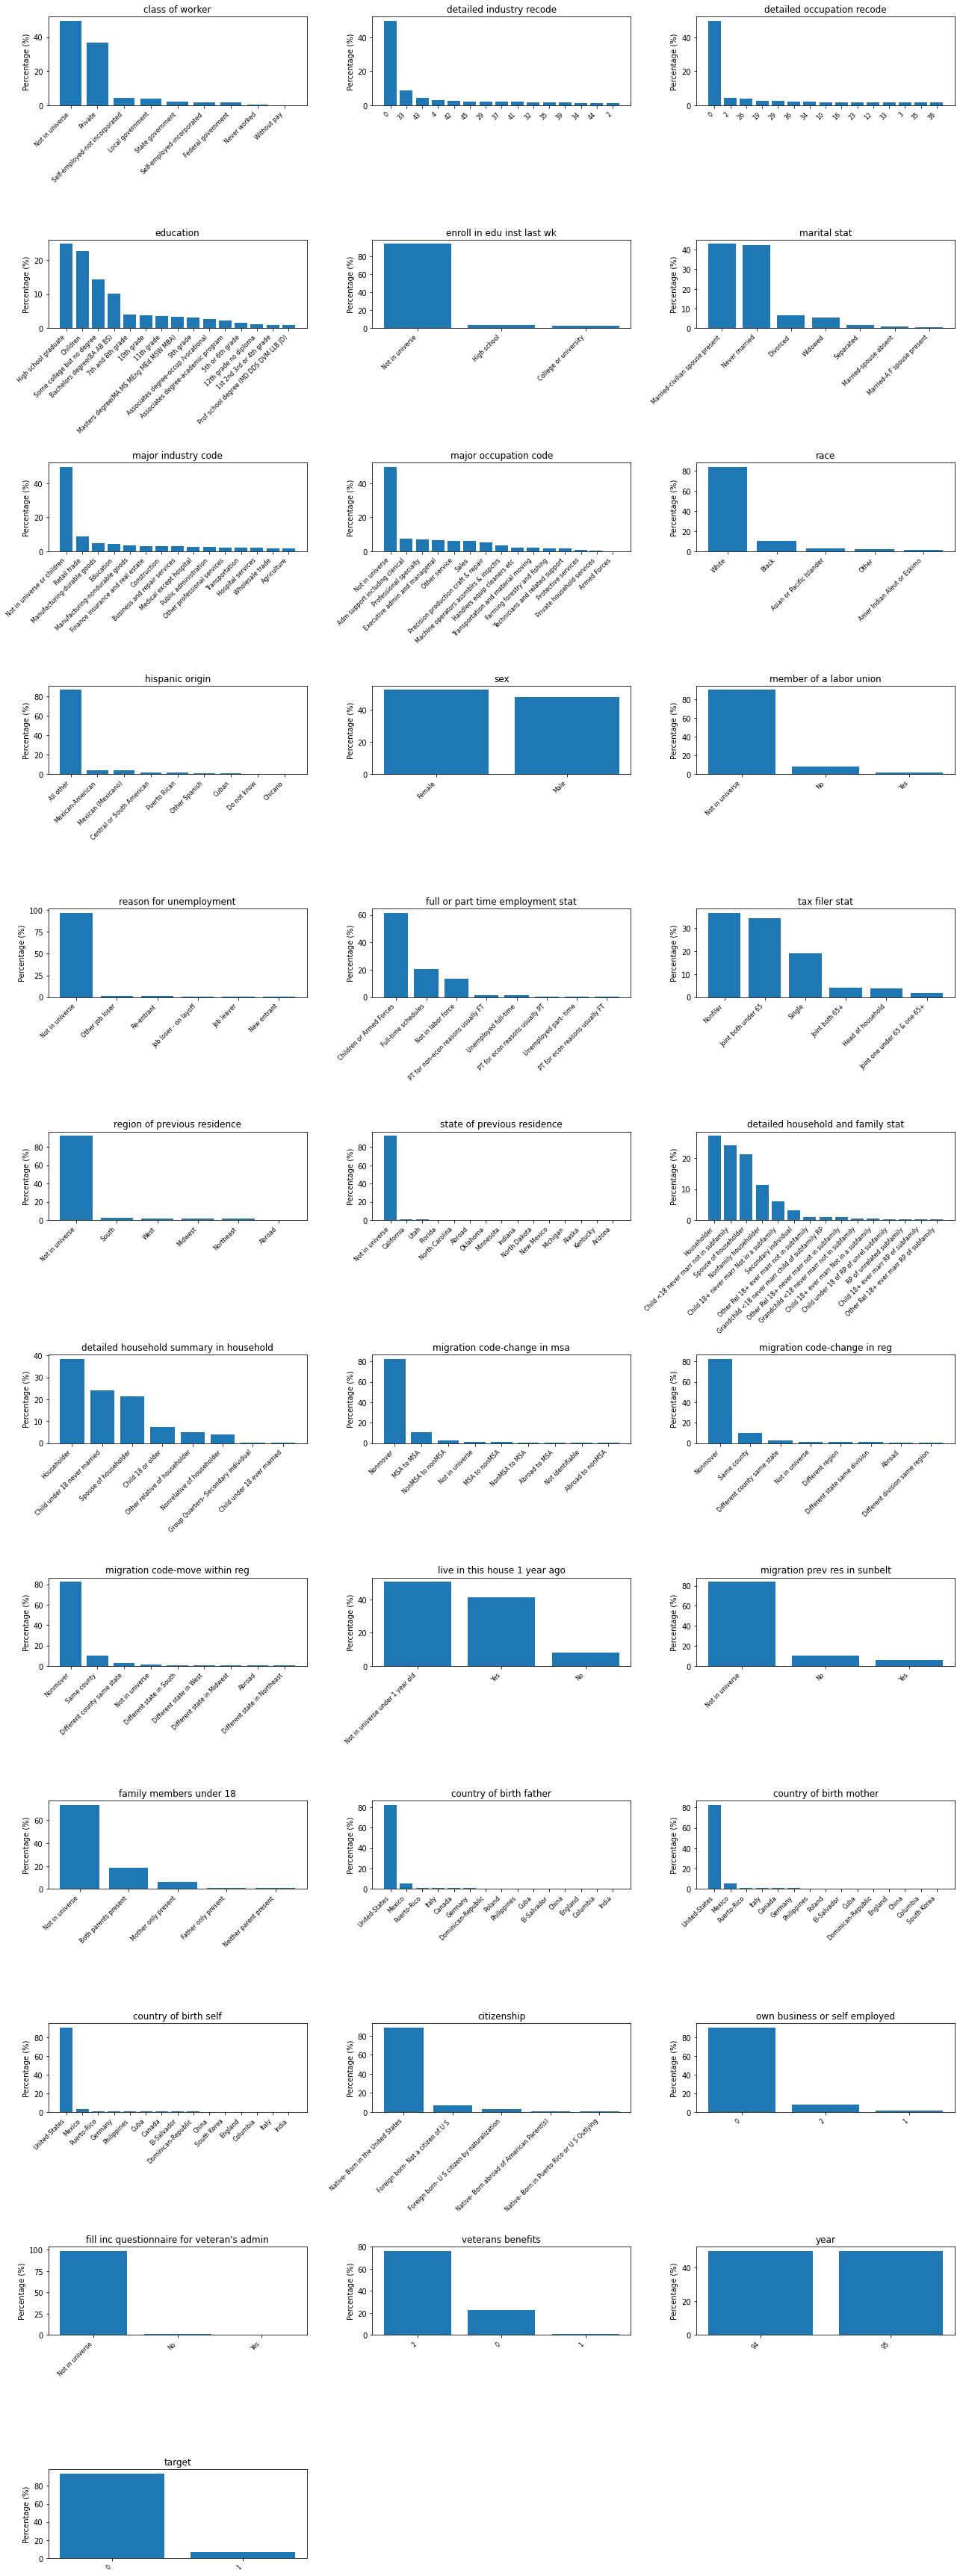

In [16]:
plot_categorical_grid(df, categorical_columns)

It's clear that this is a high dimensional dataset with highly cardinal and often skewed features. Feeding all of them into the model will hamper performance and increase complexity. It will be better to reliminate some features and modify the values in some of the features to keep the model simple and interpretable. 

## Feature Removal


| Removed Features | Justification for Removal |
| :--- | :--- |
| **Migration-related variables** (`migration prev res in sunbelt`, `migration code-change in msa`, `migration code-change in reg`,`migration code-move within reg`) | High missingness (**~50%+**), severe class imbalance |
| **Country of birth variables** (`country of birth father`, `country of birth mother`, `country of birth self`) | **Extremely high cardinality** and severe class imbalance. Redundant signal already captured by the lower-cardinality “citizenship” variable. |
| **Previous residence variables** ( `state of previous residence`, `region of previous residence`) | High cardinality (50+ states/regions). High risk of overfitting if one-hot encoded. |
| **Education enrollment** (`enroll in edu inst last wk`) | Very sparse data (applies to a tiny subset). Redundant given the existing, strong features like "education" and "age." |
| **Household structure detail** (`detailed household summary in household`, `detailed household and family stat`) | Too granular, complex, and highly cardinal. |
| **Industry & occupation recodes** (`major industry code`, `detailed industry recode`, `detailed occupation recode`) | **High-cardinality**. Signal better captured by the cleaner fields like “major occupation code” and “class of worker.” |
| **Labor union membership** (`member of a labor union`) | **Extreme class imbalance**. |
| **Reason for unemployment** (`reason for unemployment`) | Only applicable to a small subset of the population (the unemployed). Too sparse. |
| **Household movement** (`live in this house 1 year ago`) | Weakly correlated to income. |
| **Family members under 18** (`family members under 18`) | Provided a very weak, non-influential signal regarding income prediction. |
| **Veterans administration variable** (`fill inc questionnaire for veteran's admin`) | Applies only to a very small, specific subset. Noisy and non-predictive of general income classification. |
| **Year** (`year`) | Contained only two values (1994 and 1995), resulting in **negligible variation** and no predictive value. |
| **Veterans benefits** (`veterans benefits`) | **Extreme imbalance** and no useful predictive signal. |

In [17]:
cols_to_drop = [
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'migration prev res in sunbelt',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'region of previous residence',
    'state of previous residence',
    'enroll in edu inst last wk',
    'detailed household and family stat',
    'detailed household summary in household',
    'detailed industry recode',
    'detailed occupation recode',
    'major industry code',
    'member of a labor union',
    'reason for unemployment',
    'live in this house 1 year ago',
    'family members under 18',
    'fill inc questionnaire for veteran\'s admin',
    'year',
    'veterans benefits'
]

In [18]:
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], axis=1)
numerical_columns = [col for col in numerical_columns if col not in cols_to_drop]
categorical_columns = [col for col in categorical_columns if col not in cols_to_drop]

In [19]:
df.head()

,age,class of worker,education,wage per hour,marital stat,major occupation code,race,hispanic origin,sex,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,weight,num persons worked for employer,citizenship,own business or self employed,weeks worked in year,target
0,73,Not in universe,High school graduate,0,Widowed,Not in universe,White,All other,Female,Not in labor force,0,0,0,Nonfiler,1700.09,0,Native- Born in the United States,0,0,0
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,1053.55,1,Native- Born in the United States,0,52,0
2,18,Not in universe,10th grade,0,Never married,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,991.95,0,Foreign born- Not a citizen of U S,0,0,0
3,9,Not in universe,Children,0,Never married,Not in universe,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,1758.14,0,Native- Born in the United States,0,0,0
4,10,Not in universe,Children,0,Never married,Not in universe,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,1069.16,0,Native- Born in the United States,0,0,0


In [20]:
num_cols_stats, cat_cols_stats = summarize(df)
cat_cols_stats

,Null Count,NaN Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
class of worker,0 (0.00%),0 (0.00%),9,Not in universe,97029,0
education,0 (0.00%),0 (0.00%),17,High school graduate,48374,0
marital stat,0 (0.00%),0 (0.00%),7,Married-civilian spouse present,84194,0
major occupation code,0 (0.00%),0 (0.00%),15,Not in universe,97467,0
race,0 (0.00%),0 (0.00%),5,White,164380,0
hispanic origin,870 (0.44%),870 (0.44%),9,All other,168803,0
sex,0 (0.00%),0 (0.00%),2,Female,102400,0
full or part time employment stat,0 (0.00%),0 (0.00%),8,Children or Armed Forces,120632,0
tax filer stat,0 (0.00%),0 (0.00%),6,Nonfiler,71903,0
citizenship,0 (0.00%),0 (0.00%),5,Native- Born in the United States,173786,0


In [21]:
df['hispanic origin'].value_counts()

hispanic origin
All other                    168803
Mexican-American               8008
Mexican (Mexicano)             7210
Central or South American      3891
Puerto Rican                   3306
Other Spanish                  2476
Cuban                          1122
Do not know                     305
Chicano                         303
Name: count, dtype: int64

Imputing the missing values in 'hispanic origin' with the mode

In [22]:

df['hispanic origin'] = df['hispanic origin'].fillna('All other')

<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-14-66a20b4

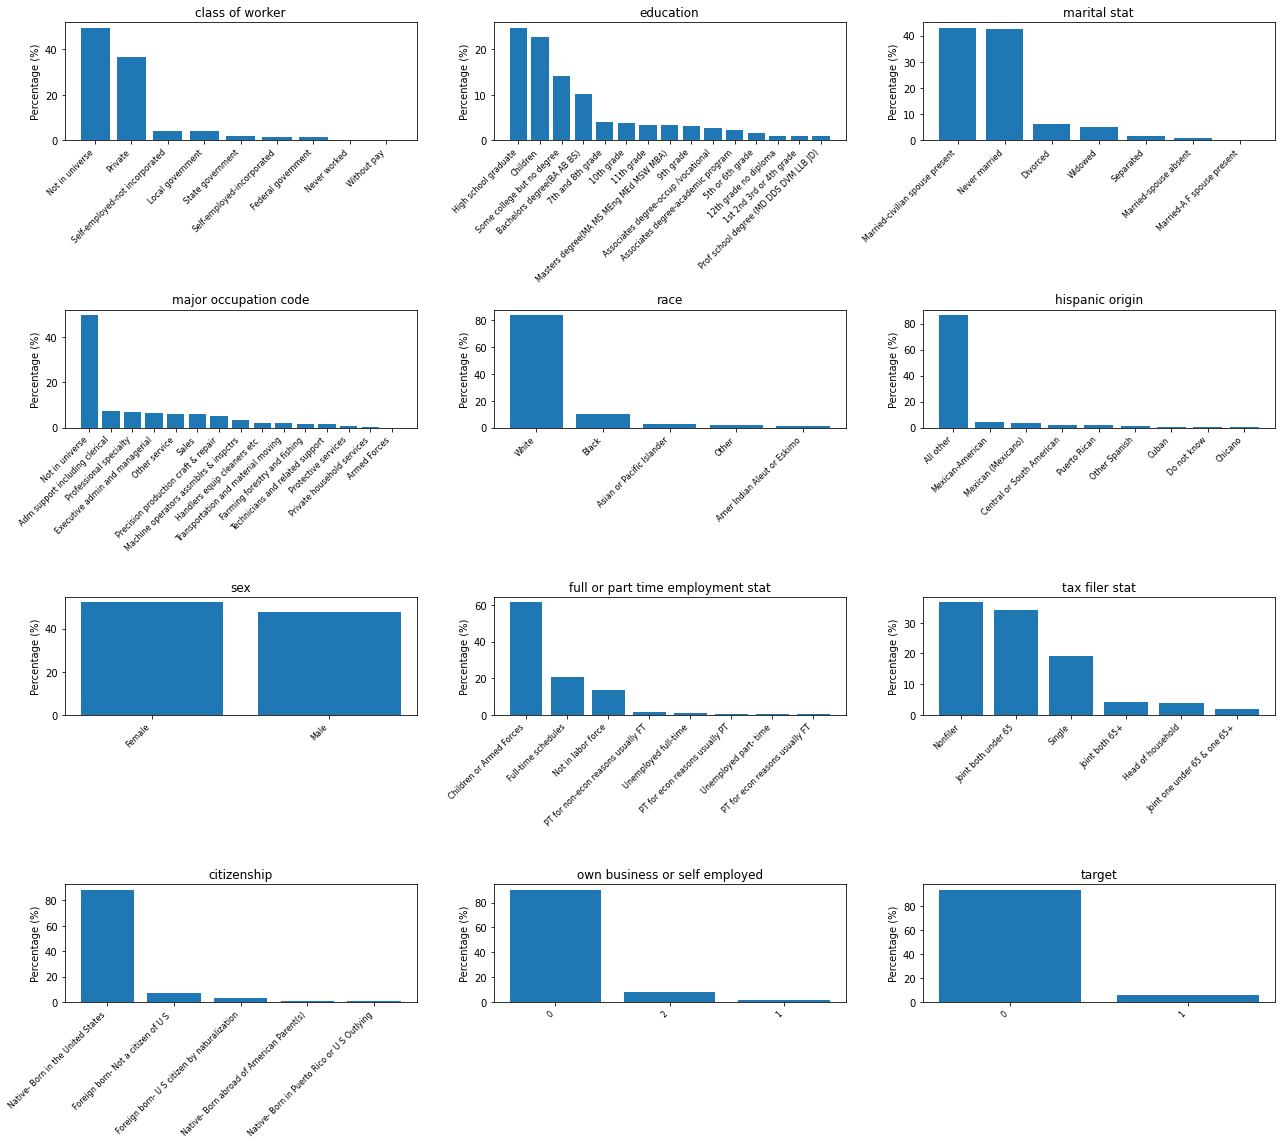

In [23]:
plot_categorical_grid(df, categorical_columns)

## Data Cleaning, Dropping, Merging

Some of the high cardinality features here are 'class of worker', 'hispanic origin', 'education', 'marital stat', 'major occupation code', 'citizenship', 'full time or part time employment stat', 'tax filer stat'. I will try to simplify them to reduce the number of values and make it simpler for modelling. 

The 'tax filer stat' categories can be merged into simpler, broader groups. Here, I am considering 'Head of Household' as 'Single' even though they might have dependants because they still represent single income structures. 

<AxesSubplot:xlabel='tax filer stat'>

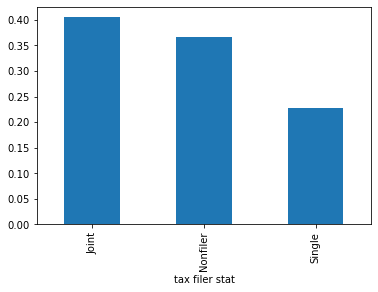

In [24]:
df['tax filer stat'] = df['tax filer stat'].replace([
    'Joint both 65+', 'Joint one under 65 & one 65+', 'Joint both under 65'
], 'Joint')
df['tax filer stat'] = df['tax filer stat'].replace({
    'Head of household': 'Single'
})
df['tax filer stat'].value_counts(normalize=True).plot(kind='bar')

Simplifying Class of Worker feature: Merging government categories, renaming 'Not in universe', and merging the remaining rare categories into 'Other'

<AxesSubplot:xlabel='class of worker'>

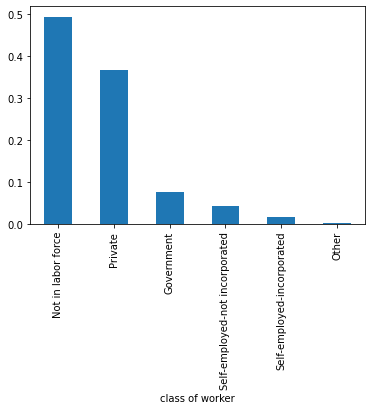

In [25]:

df['class of worker'] = df['class of worker'].replace({
    "Not in universe": "Not in labor force",
    "Federal government": "Government",
    "State government": "Government",
    "Local government": "Government",
    "Never worked": "Other",
    "Without pay": "Other",
})
df['class of worker'].value_counts(normalize=True).plot(kind='bar')

Simplifying marital stat by defining only three categories: 'Married', 'Previously Married', and 'Never Married'

<AxesSubplot:xlabel='marital stat'>

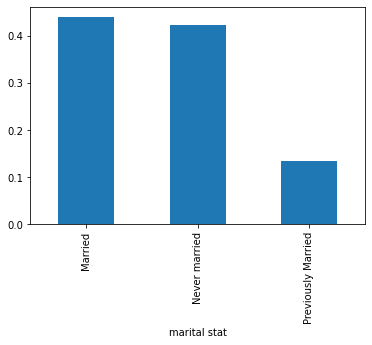

In [26]:
df['marital stat'] = df['marital stat'].replace([
     "Married-civilian spouse present",
    "Married-A F spouse present",
    "Married-spouse absent"], "Married")
df['marital stat'] = df['marital stat'].replace([
    "Divorced",
    "Separated",
    "Widowed"], "Previously Married")
df['marital stat'].value_counts(normalize=True).plot(kind='bar')

The 'education' feature has many categories and they can be merged into groups. They follow a clear order from least to most educated. Therefore, we can map these groups to ordinal integers to retain the information about education levels without creating too many dummy variables. This will help in reducing dimensionality while preserving the inherent order in education levels.


<AxesSubplot:xlabel='education'>

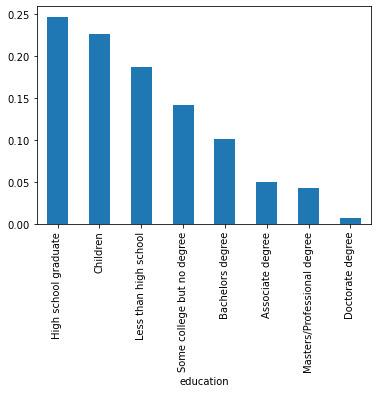

In [27]:
df['education'] = df['education'].replace([
    "Less than 1st grade",
    "1st 2nd 3rd or 4th grade",
    "5th or 6th grade",
    "7th and 8th grade",
    "9th grade",
    "10th grade",
    "11th grade",
    "12th grade no diploma",
], "Less than high school")
df['education'] = df['education'].replace([
    'Associates degree-occup /vocational',
    'Associates degree-academic program'
], "Associate degree")
df['education'] = df['education'].replace({
    'Bachelors degree(BA AB BS)': 'Bachelors degree',
    'Masters degree(MA MS MEng MEd MSW MBA)': 'Masters/Professional degree',
    'Prof school degree (MD DDS DVM LLB JD)': 'Masters/Professional degree',
    'Doctorate degree(PhD EdD)': 'Doctorate degree',
})
education_order = [
    'Children',
    'Less than high school',
    'High school graduate',
    'Some college but no degree',
    'Associate degree',
    'Bachelors degree',
    'Masters/Professional degree',
    'Doctorate degree'
]
df['education'].value_counts(normalize=True).plot(kind='bar')

The 'citizenship' feature can also be consolidated into simpler groups: 'Native Citizen', 'Naturalized' and 'Non Citizen'

<AxesSubplot:xlabel='citizenship'>

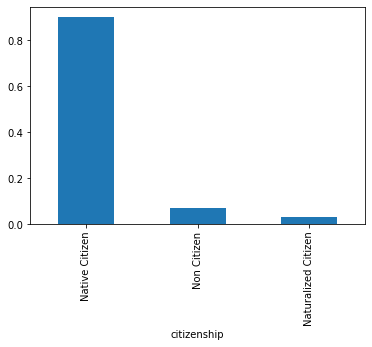

In [28]:
df['citizenship'] = df['citizenship'].replace([
    'Native- Born abroad of American Parent(s)','Native- Born in Puerto Rico or U S Outlying', 'Native- Born in the United States'
       ], 'Native Citizen')
df['citizenship'] = df['citizenship'].replace({
    'Foreign born- Not a citizen of U S ': 'Non Citizen',
    'Foreign born- U S citizen by naturalization': 'Naturalized Citizen'
})
df['citizenship'].value_counts(normalize=True).plot(kind='bar')

The 'major occupation code' is  highly specific and difficult for the model to use effectively. I will group them together into broader categories.

<AxesSubplot:xlabel='major occupation code'>

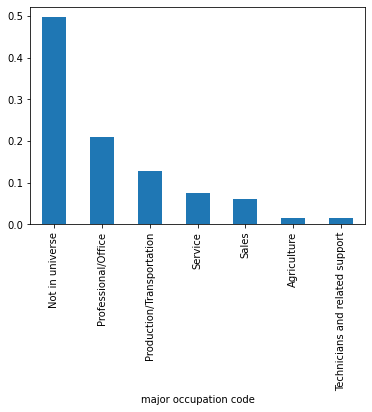

In [29]:
df['major occupation code'] = df['major occupation code'].replace([
    "Adm support including clerical",
    "Executive admin and managerial",
    "Professional specialty"
],"Professional/Office")

df['major occupation code'] = df['major occupation code'].replace([
    "Precision production craft & repair",
    "Machine operators assmblrs & inspctrs",
    "Transportation and material moving",
    "Handlers equip cleaners etc ",
],"Production/Transportation")

df['major occupation code'] = df['major occupation code'].replace([
    "Other service",
    "Private household services",
    "Protective services",
    "Armed Forces"
],"Service")

df['major occupation code'] = df['major occupation code'].replace({
    "Farming forestry and fishing": "Agriculture"
})

df['major occupation code'].value_counts(normalize=True).plot(kind='bar')


Many of the specific origins can be clubbed together into hispanic and all other 

<AxesSubplot:xlabel='hispanic origin'>

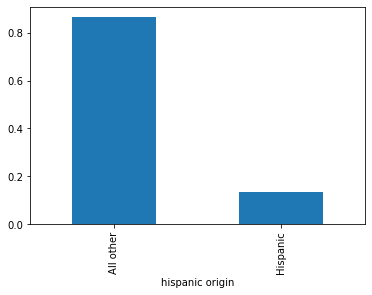

In [30]:
df['hispanic origin'] = df['hispanic origin'].replace([
    'Central or South American','Mexican (Mexicano)', 'Mexican-American', 'Other Spanish',
    'Puerto Rican', 'Cuban', 'Chicano'
], "Hispanic")
df['hispanic origin'] = df['hispanic origin'].replace({
    'Do not know': 'All other'
})
df['hispanic origin'].value_counts(normalize=True).plot(kind='bar')

The original employment-status field contained many small, overlapping categories. To make the feature more interpretable and useful, I merged them into broader groups.

<AxesSubplot:xlabel='full or part time employment stat'>

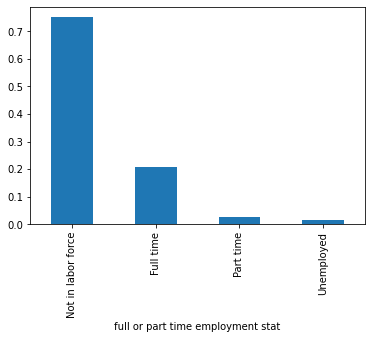

In [31]:
df['full or part time employment stat'] = df['full or part time employment stat'].replace([
    'Unemployed full-time','Unemployed part- time'
], 'Unemployed')
df['full or part time employment stat'] = df['full or part time employment stat'].replace([
    'PT for non-econ reasons usually FT', 'PT for econ reasons usually PT', 'PT for econ reasons usually FT'
], 'Part time')
df['full or part time employment stat'] = df['full or part time employment stat'].replace({
    'Children or Armed Forces': 'Not in labor force',
    'Full-time schedules': 'Full time'
})
df['full or part time employment stat'].value_counts(normalize=True).plot(kind='bar')

In [32]:
ordinal_columns = ['education']
if 'education' in  categorical_columns:
    categorical_columns.remove('education')
if 'target' in categorical_columns:
    categorical_columns.remove('target')
if 'weight' in numerical_columns:
    numerical_columns.remove('weight')

Sanity Features Check 

In [33]:
print(f"Categorical ({len(categorical_columns)}): ",categorical_columns)
print(f"Numeric ({len(numerical_columns)}): ", numerical_columns)
print(f"Ordinal ({len(ordinal_columns)}): ", ordinal_columns)
print(f"Full DF ({len(df.columns)} columns): ")
print(df.columns)

Categorical (10):  ['class of worker', 'marital stat', 'major occupation code', 'race', 'hispanic origin', 'sex', 'full or part time employment stat', 'tax filer stat', 'citizenship', 'own business or self employed']
Numeric (7):  ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'weeks worked in year']
Ordinal (1):  ['education']
Full DF (20 columns): 
Index(['age', 'class of worker', 'education', 'wage per hour', 'marital stat',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat', 'weight',
       'num persons worked for employer', 'citizenship',
       'own business or self employed', 'weeks worked in year', 'target'],
      dtype='object')


## Scaling and Encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

ordinal_transformer = Pipeline(
    steps=[('ordinal', OrdinalEncoder(categories=[education_order]))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ]
)

## Train-Test-Split & Threshold Tuning Function

I'll split the data into three parts: \
60% Train\
20% Validation\
20% Test\
\
Since the target class is so under-represented, it won't be fair for the probability threshold for predicting the minority class to be 0.5. The validation data will be used for estimating a custom probability threshold for an individual to be classified as having an income of 50k+. 


In [36]:
from sklearn.model_selection import train_test_split
X = df[numerical_columns + categorical_columns+ordinal_columns]
y = df['target']
sample_weights = df['weight']

# first split: train vs temp
X_train, X_temp, y_train, y_temp, w_train, w_temp = train_test_split(
    X, y, sample_weights,
    test_size=0.4,    # 60% train, 40% temp
    stratify=y,
    random_state=42
)

# second split: validation vs test (each 20%)
X_val, X_test, y_val, y_test, w_val, w_test = train_test_split(
    X_temp, y_temp, w_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)


## Threshold Tuning Function

The probability threshold can be estimated using either f-1 score or the Youden's J score. Optimizing for F-1 score will mean a balance of precision and recall on the target class, whereas optimizing for J score will prioritize recall over precision on the target class. 

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_curve
import matplotlib.pyplot as plt

def finetune_from_proba(y_proba_val, optimize_for='f1'):
    thresholds = np.linspace(0, 1, 501)  # thresholds from 0.00 to 1.00
    results = []

    for t in thresholds:
        y_pred = (y_proba_val >= t).astype(int)
        precision = precision_score(y_val, y_pred, sample_weight=w_val)
        recall = recall_score(y_val, y_pred, sample_weight=w_val)
        f1 = f1_score(y_val, y_pred, sample_weight=w_val)
        results.append((t, precision, recall, f1))

    results = np.array(results)
    plt.plot(results[:, 0], results[:, 1], label='Precision')
    plt.plot(results[:, 0], results[:, 2], label='Recall')
    plt.plot(results[:, 0], results[:, 3], label='F1 Score')

    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Threshold Tuning: Precision, Recall, F1")
    plt.legend()
    plt.grid(True)
    plt.show()
    if optimize_for=='f1':
        best_f1_idx = results[:, 3].argmax()
        best_threshold = results[best_f1_idx, 0]
        print(f"Chosen criterion: F1 score")
        print(f"Best threshold for F1: {best_threshold}")
    else:
        fpr, tpr, roc_thresholds = roc_curve(y_val, y_proba_val, sample_weight=w_val)
        J_scores = tpr - fpr
        j_best_idx = np.argmax(J_scores)
        best_threshold = roc_thresholds[j_best_idx]
        print(f"Chosen criterion: Youden's J (TPR - FPR)")
        print(f"Best threshold for J: {best_threshold:.4f}")
    
    return best_threshold

def finetune_threshold(clf, is_catboost=False, optimize_for='f1'):
    if is_catboost:
        y_proba_val = clf.predict_proba(val_pool)[:, 1]
        y_proba_test = clf.predict_proba(test_pool)[:, 1]
    else:
        y_proba_val = clf.predict_proba(X_val)[:, 1]
        y_proba_test = clf.predict_proba(X_test)[:, 1]
    
    best_threshold = finetune_from_proba(y_proba_val, optimize_for=optimize_for)
    final_preds = (y_proba_test >= best_threshold).astype(int)

    print("Classification report @ tuned threshold:")
    print(classification_report(y_test, final_preds, sample_weight=w_test))
    return best_threshold


I tried three different models for the classification task:
1. Logistic Regression 
2. XGBoost
3. Cat Boost


All of them will be threshold finetuned for f1 score for a balanced model

## Logistic Regression Classifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(max_iter=3000))
    ]
)

log_clf.fit(X_train, y_train,model__sample_weight=w_train)
preds = log_clf.predict(X_test)
probs = log_clf.predict_proba(X_test)[:,1]
print("Baseline Classification Report Logistic Regression:")
print(classification_report(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs, sample_weight=w_test))

Baseline Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     36783
           1       0.71      0.35      0.46      2476

    accuracy                           0.95     39259
   macro avg       0.83      0.67      0.72     39259
weighted avg       0.94      0.95      0.94     39259

ROC AUC: 0.9373805226365989


/Users/manan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


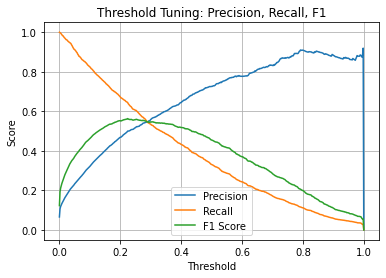

Chosen criterion: F1 score
Best threshold for F1: 0.224
Classification report @ tuned threshold:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96 64116440.28
           1       0.49      0.63      0.55 4465054.170000013

    accuracy                           0.93 68581494.45000002
   macro avg       0.73      0.79      0.76 68581494.45000002
weighted avg       0.94      0.93      0.94 68581494.45000002



In [39]:
best_threshold_log = finetune_threshold(log_clf)

## XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    tree_method='hist'
)

xgb_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', xgb_model)
    ]
)

xgb_clf.fit(X_train, y_train, model__sample_weight=w_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'wage per hour',
                                                   'capital gains',
                                                   'capital losses',
                                                   'dividends from stocks',
                                                   'num persons worked for '
                                                   'employer',
                                                   'weeks worked in year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['class of worker',
                                                   'marital stat'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [42]:
preds = xgb_clf.predict(X_test)
probs = xgb_clf.predict_proba(X_test)[:,1]
print("Baseline Classification Report XGBoost:")
print(classification_report(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs, sample_weight=w_test))

Baseline Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     36783
           1       0.30      0.89      0.45      2476

    accuracy                           0.86     39259
   macro avg       0.65      0.88      0.69     39259
weighted avg       0.95      0.86      0.89     39259

ROC AUC: 0.9494345318853752


/Users/manan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


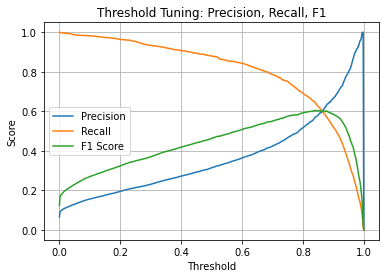

Chosen criterion: F1 score
Best threshold for F1: 0.84
Classification report @ tuned threshold:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97 64116440.28
           1       0.56      0.63      0.59 4465054.170000013

    accuracy                           0.94 68581494.45000002
   macro avg       0.77      0.80      0.78 68581494.45000002
weighted avg       0.95      0.94      0.95 68581494.45000002



In [43]:
best_threshold_xgb = finetune_threshold(xgb_clf)

## CatBoost

In [44]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


In [45]:
cat_features = [X.columns.get_loc(col) for col in (categorical_columns+ordinal_columns)]
train_pool = Pool(
    X_train.to_numpy(),
    label=y_train.to_numpy(),
    weight=w_train.to_numpy(),
    cat_features=cat_features
)

val_pool = Pool(
    X_val.to_numpy(),
    label=y_val.to_numpy(),
    weight=w_val.to_numpy(),
    cat_features=cat_features
)

test_pool = Pool(
    X_test.to_numpy(),
    label=y_test.to_numpy(),
    weight=w_test.to_numpy(),
    cat_features=cat_features
)
cat_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    depth=6,
    learning_rate=0.1,
    iterations=1000,
    random_seed=42,
    thread_count=-1,
    verbose = 200
)
cat_model.fit(
    train_pool,
    eval_set=val_pool,
    use_best_model=True
)
preds = cat_model.predict(test_pool)
probs = cat_model.predict_proba(test_pool)[:,1]
print("Baseline Classification Report Logistic Regression:")
print(classification_report(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs, sample_weight=w_test))

0:	test: 0.6554852	best: 0.6554852 (0)	total: 84.1ms	remaining: 1m 24s
200:	test: 0.9440226	best: 0.9440226 (200)	total: 6.84s	remaining: 27.2s
400:	test: 0.9469632	best: 0.9469705 (399)	total: 16.1s	remaining: 24s
600:	test: 0.9476810	best: 0.9476837 (598)	total: 25.6s	remaining: 17s
800:	test: 0.9478684	best: 0.9478684 (800)	total: 34.7s	remaining: 8.63s
999:	test: 0.9479948	best: 0.9479948 (999)	total: 44.4s	remaining: 0us

bestTest = 0.9479948438
bestIteration = 999

Baseline Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36783
           1       0.74      0.47      0.57      2476

    accuracy                           0.96     39259
   macro avg       0.85      0.73      0.77     39259
weighted avg       0.95      0.96      0.95     39259

ROC AUC: 0.9516089207399897


/Users/manan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


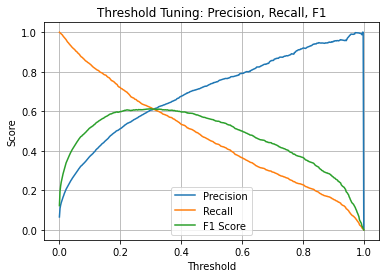

Chosen criterion: F1 score
Best threshold for F1: 0.298
Classification report @ tuned threshold:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97 64116440.28
           1       0.60      0.62      0.61 4465054.170000013

    accuracy                           0.95 68581494.45000002
   macro avg       0.79      0.79      0.79 68581494.45000002
weighted avg       0.95      0.95      0.95 68581494.45000002



In [46]:
best_threshold_cat = finetune_threshold(cat_model, is_catboost=True)

Catboost performs the best amongst the three models with a 95% accuracy and a f-1 score of 0.61 on the test data, using a classification threshold of 0.298. 

/Users/manan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


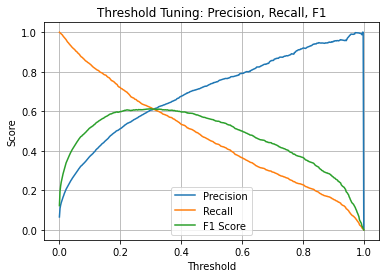

Chosen criterion: Youden's J (TPR - FPR)
Best threshold for J: 0.0656
Classification report @ tuned threshold:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92 64116440.28
           1       0.31      0.90      0.46 4465054.170000013

    accuracy                           0.86 68581494.45000002
   macro avg       0.65      0.88      0.69 68581494.45000002
weighted avg       0.95      0.86      0.89 68581494.45000002



In [48]:
best_threshold_cat_j = finetune_threshold(cat_model, is_catboost=True, optimize_for='j')

On optimizing for Youden's J score, the model takes a performance hit, bringing the overall accuracy to 86% on the target class with a probability threshold of 0.0656. However, the model has a 90% recall on the target class being 1.

In [50]:
from sklearn.metrics import confusion_matrix
y_preds_j = (probs>=best_threshold_cat_j).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_j).ravel()
print("Total number of test samples: ", len(y_test))
print("True positive: ", tp)
print("False positive: ", fp)
print(f"Ratio of False Positives (FP):  {fp/(fp+tp+tn+fn):.4f}")

Total number of test samples:  39259
True positive:  2216
False positive:  5125
Ratio of False Positives (FP):  0.1305


Final Recommendation:

The overall best performing model is the F-1 optimized Catboost model with a 95% accuracy. This will work the best for a diverse set of use cases, with a F1 score of 0.61 on the minority target class, balancing precision and recall. However, if the objective is to target the wealthy class (individuals having income> 50k), then the J optimized Catboost model is a great choice. With a recall of 90% on the positive class, most of the target demographic will be covered, while the False Positive Ratio of 13.9% presents a manageable trade-off in doing so. 

# Final Model Feature Importances

In [ ]:
import pandas as pd

feature_importances = cat_model.get_feature_importance()
feature_names = X_train.columns.to_list()

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values("importance", ascending=False)

print(importance_df.head(20))  # top 20 features


                              feature  importance
0                                 age   31.128500
17                          education   11.820709
6                weeks worked in year   10.689194
8                        marital stat    6.464098
14                     tax filer stat    5.458020
12                                sex    5.414160
9               major occupation code    4.255838
5     num persons worked for employer    3.677340
4               dividends from stocks    3.583496
2                       capital gains    3.373770
7                     class of worker    3.022779
13  full or part time employment stat    2.969806
10                               race    2.058679
3                      capital losses    1.818603
11                    hispanic origin    1.189417
1                       wage per hour    1.180805
15                        citizenship    1.163570
16      own business or self employed    0.731215


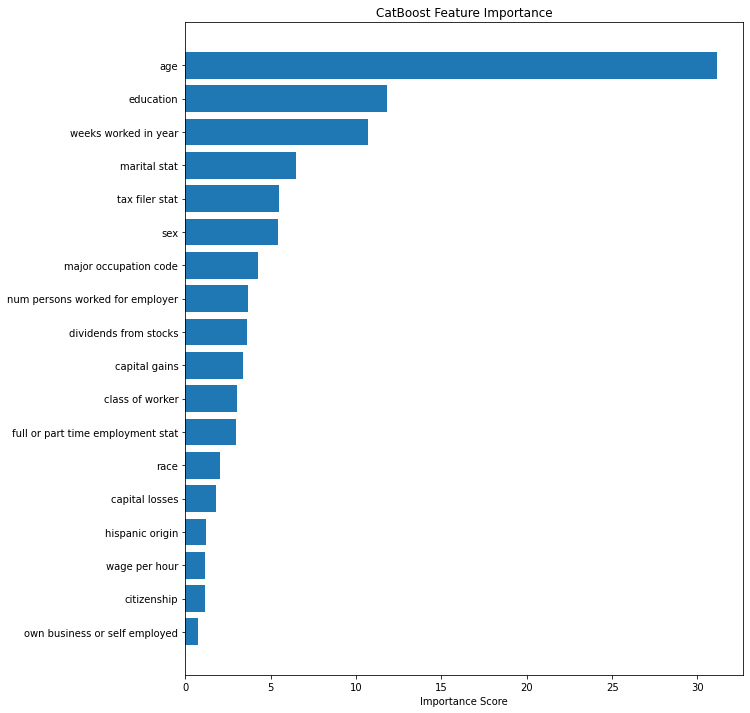

In [ ]:
plt.figure(figsize=(10, 12))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()


1. The model shows that age is the strongest predictor of earning over $50K, suggesting income likelihood increases significantly with career progression and experience. 
2. Education level and weeks worked in a year are the next most important features, highlighting that both human capital and consistent labor play a major role in crossing the $50K threshold.
3. Demographic and job-structure variables such as marital status, tax filer status, sex, occupation, and class of worker contribute moderately, indicating socioeconomic and employment-type effects.
4. Investment-related variables (capital gains, dividends) add some predictive value but are secondary
5. Factors like citizenship, race, and self-employment have relatively low importance, meaning they add limited incremental signal once core labor and education variables are accounted for.